In [46]:
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tweepy as tw
import geopandas as gpd
import pandas as pd
from time import sleep
import us 
import hvplot.pandas
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
from shapely.geometry import Point
import requests
from bs4 import BeautifulSoup
import textblob
import seaborn as sns
import nltk
nltk.download('stopwords');
import string
import altair as alt
from altair import *
alt.renderers.enable('notebook')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


RendererRegistry.enable('notebook')

### Web Scraping for List of Foods

In [47]:
rsp = requests.get('https://www.halfyourplate.ca/fruits-and-veggies/fruits-a-z/')
soup = BeautifulSoup(rsp.content, 'html.parser')
selector = "body > div.wrapper.interior-wrapper > div.left-column > ul > li >a"
rows = soup.select(selector)

healthyfood = []
for row in rows: 
    fruit = row.text
    healthyfood.append(fruit)

rsp2 = requests.get('https://www.halfyourplate.ca/fruits-and-veggies/veggies-a-z/')
soup2 = BeautifulSoup(rsp2.content, 'html.parser')
selector2 = "body > div.wrapper.interior-wrapper > div.left-column > ul > li > a"
rows2 = soup2.select(selector2)

for row in rows2: 
    veg = row.text
    healthyfood.append(veg)

soup4 = BeautifulSoup(requests.get('https://www.eatthis.com/healthiest-foods-on-planet/').content, 'html.parser')
rows4 = soup4.select("body > div.white-wrapper > div.single-post.container-fluid.max-width.main-page-content.post-353084.post.type-post.status-publish.format-standard.has-post-thumbnail.hentry.category-healthy-eating.tag-food-nutrition.tag-healthy-foods.tag-healthy-snacks > div.row.main-area > div.main-content > div.content > div > div > h2")

for row in rows4: 
    food = row.text
    healthyfood.append(food)

soup6 = BeautifulSoup(requests.get('https://www.choosemyplate.gov/eathealthy/protein-foods/protein-foods-group-food-gallery').content, 'html.parser')
rows6 = soup6.select("#block-usda-myplatekitchen-theme-content > article > div > table > tbody > tr > td > ul > li")
len(rows6)

for row in rows6: 
    food = row.text
    healthyfood.append(food)

soup7 = BeautifulSoup(requests.get('https://www.choosemyplate.gov/eathealthy/grains/grains-group-food-gallery').content, 'html.parser')
rows7 = soup7.select("#block-usda-myplatekitchen-theme-content > article > div > table > tbody > tr > td > ul > li")
len(rows7)

for row in rows7: 
    food = row.text
    healthyfood.append(food)

len(healthyfood)

healthy_fix = []
for i in healthyfood: 
    i = i.replace(u'\n\t\t\t\t\xa0', u'')
    i = i.replace(u'*', u'')
    healthy_fix.append(i) 

healthy_unique = [] 
for i in healthy_fix: 
    if i not in healthy_unique: 
        healthy_unique.append(i) 

healthy_unique

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [4]:
rsp3 = requests.get('https://en.wikipedia.org/wiki/List_of_snack_foods')
soup3 = BeautifulSoup(rsp3.content, 'html.parser')
rows3 = soup3.select("#mw-content-text > div > table > tbody > tr > td:nth-child(1) > a")
len(rows3)

unhealthyfood = []
for row in rows3: 
    food = row.text
    unhealthyfood.append(food)

soup5 = BeautifulSoup(requests.get('https://www.eatthis.com/unhealthiest-foods-on-the-planet/').content, 'html.parser')
rows5 = soup5.select("body > div.white-wrapper > div.single-post.container-fluid.max-width.main-page-content.post-352531.post.type-post.status-publish.format-standard.has-post-thumbnail.hentry.category-healthy-eating.tag-foods-to-avoid.tag-unhealthy > div.row.main-area > div.main-content > div.content > div > div > h2")
len(rows5)

for row in rows5: 
    food = row.text
    unhealthyfood.append(food)

unhealthy_unique = [] 
for i in unhealthyfood: 
    if i not in unhealthy_unique: 
        unhealthy_unique.append(i) 
unhealthy_unique

['Bitterballen',
 'Bonda',
 'Cereal',
 'Cokodok',
 'Cracker nuts',
 'Crêpe',
 'Croquette',
 'Doughnut',
 'Gulha',
 'Khanom buang',
 'Pakora',
 'Pancakes',
 'Parippu Vada',
 'Pazham Pori',
 'Pizza',
 'Poffertjes',
 'Pretzel',
 'Waffle',
 'Brittle',
 'Imli Candy',
 'Bubblegum',
 'Candy',
 'Chocolate',
 'Chocolate bar',
 'Chocolate truffle',
 'Fudge',
 'Geplak',
 'Grass jelly',
 'Marshmallow',
 'Marzipan',
 'Nougat',
 'Panforte',
 'Pudding',
 'Rice Krispie treats',
 "S'mores",
 'Toffee',
 'Turkish delight',
 'Arrowroot',
 'Chocolate chip cookie',
 'Cookie',
 'Ginger snaps',
 'Graham crackers',
 'Oatmeal cookie',
 'Peanut butter cookie',
 'Gansito',
 'Jaffa Cakes',
 'Snack cake',
 'Churros',
 'Fairy bread',
 'Fruit bun',
 'Pastry',
 'Scones',
 'pie',
 'Toaster pastry',
 'Amazake',
 'Atole',
 'Coffee',
 'Colada morada',
 'Energy drinks',
 'Red Bull',
 'Monster',
 'Flavored milk',
 'Horchata',
 'Juice',
 'Kefir',
 'Malted milk',
 'Milkshake',
 'Root beer',
 'Root beer float',
 'Sikhye',
 'So

In [48]:
soup8 = BeautifulSoup(requests.get('https://www.qsrmagazine.com/reports/qsr50-2012-top-50-chart').content, 'html.parser')
rows8 = soup8.select("#sortable-chart > tbody > tr > td.data-chain_name")
len(rows8)

fastfood = []
for row in rows8: 
    food = row.text
    fastfood.append(food)

fastfood_fix = []
for i in fastfood: 
    i = i.replace(u'1', u'')
    i = i.replace(u'*', u'')
    i = i.replace(u'2', u'')
    fastfood_fix.append(i) 
    
fastfood_fix

['McDonald’s',
 'Subway',
 'Starbucks',
 'Wendy’s',
 'Burger King',
 'Taco Bell',
 'Dunkin’ Donuts',
 'Pizza Hut',
 'KFC',
 'Chick-fil-A',
 'Sonic Drive-In',
 'Domino’s Pizza',
 'Panera Bread',
 'Arby’s',
 'Jack in the Box',
 'Dairy Queen',
 'Chipotle Mexican Grill',
 'Papa John’s',
 'Hardee’s',
 'Popeyes Louisiana Kitchen',
 'Panda Express',
 'Carl’s Jr.',
 'Little Caesars',
 'Whataburger',
 'Five Guys Burgers & Fries',
 'Quiznos',
 'Jimmy John’s',
 'Church’s Chicken',
 'Zaxby’s',
 'Steak ‘n Shake',
 'Bojangles’',
 'Culver’s',
 'Papa Murphy’s',
 'Checkers/Rally’s',
 'Long John Silver’s',
 'White Castle',
 'Del Taco',
 'El Pollo Loco',
 'Jason’s Deli',
 'Boston Market',
 'Krispy Kreme',
 'Qdoba Mexican Grill',
 'CiCi’s Pizza',
 'In-N-Out Burger',
 'Baskin-Robbins',
 'Tim Hortons',
 'Einstein Bros. Bagels',
 'Captain D’s',
 'Sbarro',
 'Krystal']

In [49]:
meals = ['breakfast', 'brunch', 'dinner', 'lunch', 'snack', 'recipe', 'cuisine', 'appetizer', 'dessert', 'food']

In [50]:
list_food = healthy_unique + unhealthy_unique + fastfood_fix + meals

### Tweet Sentiment Analysis

In [8]:
consumer_key = '0r7qeDuOxRyJKIzk8xfxiC42k'
consumer_secret = 'gqlM82vnXxm4iVuEz5j8eT9Yqx9894KcFyJ4yOGG4fn1lWESxH'
access_token = '1199424364887691264-vjfc8pmkAK6tsbKExFAbXlKpd4rtAO'
access_token_secret = 'DdSPBYUlekhD0rB21ZwybXWkEAidTNCPXJVJIdErfMNcB'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True, timeout=5)

In [10]:
Brooklyn = api.geo_search(query="Brooklyn", granularity="city")

In [11]:
Queens = api.geo_search(query="Queens", granularity="city")

In [12]:
for place in Brooklyn:    
    print("placeid:%s" % place)

placeid:Place(_api=<tweepy.api.API object at 0x0000019E33D55160>, id='011add077f4d2da3', url='https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json', place_type='city', name='Brooklyn', full_name='Brooklyn, NY', country_code='US', country='United States', contained_within=[Place(_api=<tweepy.api.API object at 0x0000019E33D55160>, id='b6c2e04f1673337f', url='https://api.twitter.com/1.1/geo/id/b6c2e04f1673337f.json', place_type='admin', name='NEW YORK', full_name='NEW YORK', country_code='', country='', centroid=[-74.51426031557503, 40.842381], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x0000019E33D55160>, type='Polygon', coordinates=[[[-75.358407, 39.50181], [-75.358407, 42.177043], [-71.85615, 42.177043], [-71.85615, 39.50181], [-75.358407, 39.50181]]]), attributes={})], centroid=[-73.93950002939275, 40.655138], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x0000019E33D55160>, type='Polygon', coordinates=[[[-74.041878, 40.570842], [-74.041878, 40.739434], [-

In [13]:
for place in Queens:    
    print("placeid:%s" % place)

placeid:Place(_api=<tweepy.api.API object at 0x0000019E33D55160>, id='00c39537733fa112', url='https://api.twitter.com/1.1/geo/id/00c39537733fa112.json', place_type='city', name='Queens', full_name='Queens, NY', country_code='US', country='United States', contained_within=[Place(_api=<tweepy.api.API object at 0x0000019E33D55160>, id='b6c2e04f1673337f', url='https://api.twitter.com/1.1/geo/id/b6c2e04f1673337f.json', place_type='admin', name='NEW YORK', full_name='NEW YORK', country_code='', country='', centroid=[-74.51426031557503, 40.842381], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x0000019E33D55160>, type='Polygon', coordinates=[[[-75.358407, 39.50181], [-75.358407, 42.177043], [-71.85615, 42.177043], [-71.85615, 39.50181], [-75.358407, 39.50181]]]), attributes={})], centroid=[-73.82392802812883, 40.709785049999994], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x0000019E33D55160>, type='Polygon', coordinates=[[[-73.962582, 40.541722], [-73.962582, 40.800037

In [14]:
limit = api.rate_limit_status()
limit['resources']['geo']

{'/geo/similar_places': {'limit': 15, 'remaining': 15, 'reset': 1576456538},
 '/geo/place_page': {'limit': 75, 'remaining': 75, 'reset': 1576456538},
 '/geo/id/:place_id': {'limit': 75, 'remaining': 75, 'reset': 1576456538},
 '/geo/reverse_geocode': {'limit': 15, 'remaining': 15, 'reset': 1576456538},
 '/geo/search': {'limit': 15, 'remaining': 13, 'reset': 1576456530}}

In [ ]:
Brooklyn_query = tw.Cursor(api.search, q='-filter:retweets' + "place:%s" % '27485069891a7938', lang="en", tweet_mode="extended").items(1000)

In [ ]:
Queens_query = tw.Cursor(api.search, q='-filter:retweets' + "place:%s" % '00c39537733fa112', lang="en", tweet_mode="extended").items(1000)

In [ ]:
Brooklyn_tweets = [tweet for tweet in Brooklyn_query]

In [ ]:
sleep(900)

In [ ]:
Queens_tweets = [tweet for tweet in Queens_query]

In [ ]:
Brooklyn_Queens_tweets = Brooklyn_tweets + Queens_tweets

In [ ]:
Tweet_database = pd.DataFrame()

In [ ]:
Tweet_database['text'] = [tweet.full_text for tweet in Brooklyn_Queens_tweets]
Tweet_database['created_time'] = [tweet.created_at for tweet in Brooklyn_Queens_tweets]

In [ ]:
Tweet_database.reset_index().to_csv('E:\\MUSA 620 Term Project\\AllTweets_121119.csv', index = False)

In [51]:
def remove_username(txt):
    import re
    return " ".join(re.sub('@[^\s]+','',txt).split())

def remove_url(txt):
    """
    Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    import re
    return " ".join(re.sub("https://t.co/[A-Za-z\\d]+|&amp", "", txt).split())

In [52]:
Tweet_120819= pd.read_csv('E:\\MUSA 620 Term Project\\AllTweets_120819.csv')

In [53]:
Tweet_120919 = pd.read_csv('E:\\MUSA 620 Term Project\\AllTweets_120919.csv')

In [54]:
Tweet_121019 = pd.read_csv('E:\\MUSA 620 Term Project\\AllTweets_121019.csv')

In [55]:
Tweet_121119 = pd.read_csv('E:\\MUSA 620 Term Project\\AllTweets_121119.csv')

In [56]:
Tweet_text = pd.concat([Tweet_120819, Tweet_120919, Tweet_121019, Tweet_121119])

In [57]:
Tweet_text = Tweet_text['text']

In [58]:
tweets_no_urls = [remove_url(tweet) for tweet in Tweet_text]
tweets_no_urls = [remove_username(tweet) for tweet in tweets_no_urls]
tweets_no_urls[:5]

['RT Check out the new character posters from #WW84 - in theaters June 5.',
 'RT I can’t even begin to thank enough for giving me the most amazing night of my entire life✨I will treasure these me…',
 'Shit is so unreal',
 'Peter went to court. He told the court that Stanislaus was the owner of the land. Peter yelled at his children. Asked if he wanted to stay alive? Nope. The townspeople went with Peter back to cemetery... I like miracle stories.',
 'The magic school bus is just Astrotrain’s postwar side job.']

In [59]:
tweets_food = [tweet for tweet in tweets_no_urls if any(food.lower() in tweet.split() for food in list_food) or any(food.upper() in tweet.split() for food in list_food)]

In [60]:
blobs = [textblob.TextBlob(t) for t in tweets_food]

In [61]:
data = {}
data['polarity'] = [b.sentiment.polarity for b in blobs]
data['subjectivity'] = [b.sentiment.subjectivity for b in blobs]
data['text'] = [t for t in tweets_food]
data = pd.DataFrame(data)

In [67]:
category = []

In [68]:
for tweet in tweets_food:
    if any(food.lower() in tweet.split() for food in healthy_unique):
        category.append('healthy')
    elif any(food.lower() in tweet.split() for food in unhealthy_unique):
        category.append('unhealthy')
    else:
        category.append('neutral')

In [69]:
data['category'] = category

In [72]:
data.to_csv('Data\\sentiment_output.csv', index = False)

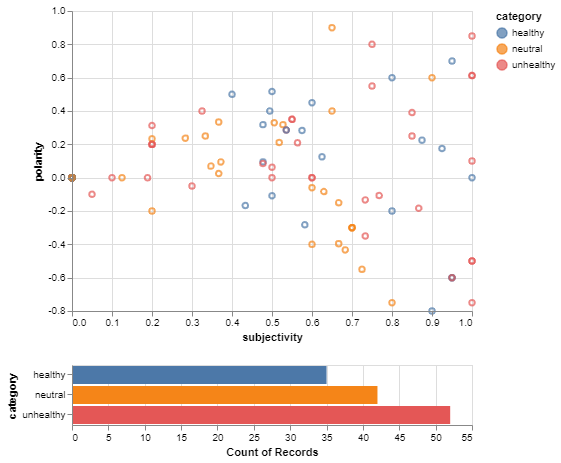

In [74]:
source = data
brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='subjectivity:Q',
    y='polarity:Q',
    color=alt.condition(brush, 'category:N', alt.value('grey')),
).add_selection(brush)

bars = alt.Chart(source).mark_bar().encode(
    y='category:N',
    color='category:N',
    x='count(category):Q'
).transform_filter(
    brush
)
points & bars

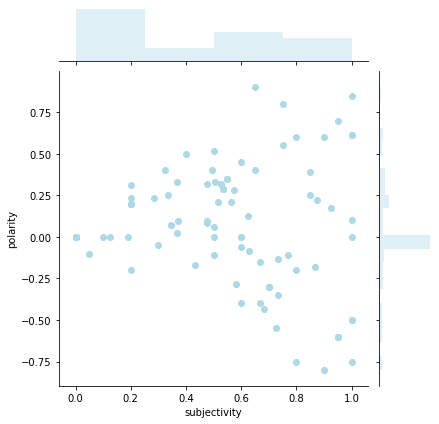

In [32]:
sns.jointplot(x="subjectivity", y="polarity", data=data, color = "lightblue");

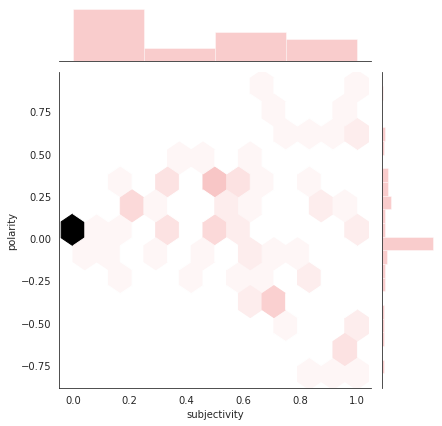

In [33]:
with sns.axes_style("white"):
    sns.jointplot(x="subjectivity", y="polarity", data=data, kind="hex", color="lightcoral");

In [35]:
data['formatted_text'] = [text.split() for text in data['text']]

In [36]:
punctuation = list(string.punctuation)
stop_words = list(set(nltk.corpus.stopwords.words('english')))
insig = stop_words + punctuation

In [37]:
data['formatted_text'] = [[word for word in tweet if word not in insig]
              for tweet in data['formatted_text']]

In [38]:
food_lower = [food.lower() for food in list_food]

In [39]:
food_upper = [food.upper() for food in list_food]

In [40]:
food_words = [[word for word in tweet if word in food_lower or word in food_upper or word in list_food] for tweet in data['formatted_text']]

In [41]:
food_words = [[word.lower() for word in tweet] for tweet in food_words]

In [42]:
def count_word_frequencies(words_in_tweet, top=15):
    """
    Given a list of all words for every tweet, count
    word frequencies across all tweets.
    
    By default, this returns the top 15 words, but you 
    can specify a different value for `top`.
    """
    import itertools, collections

    # List of all words across tweets
    all_words = list(itertools.chain(*words_in_tweet))

    # Create counter
    counter = collections.Counter(all_words)
    
    return pd.DataFrame(counter.most_common(top),
                        columns=['words', 'count'])

In [43]:
counts_final = count_word_frequencies(food_words)

In [44]:
counts_final['words'] = [word.upper() for word in counts_final['words']]

In [76]:
counts_final.to_csv('Data\\word_frequency.csv', index = False)

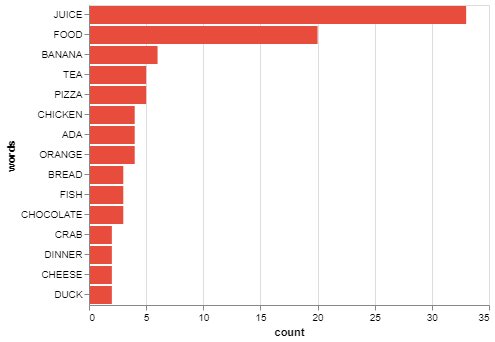

In [78]:
alt.Chart(counts_final).mark_bar(color='#E74C3C').encode(
    x='count:Q',
    y=alt.Y(
        'words:N',
        sort=alt.EncodingSortField(
            field="count", 
            order="descending"  
        )
    )
)